In [84]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Retrieval

Collecting movie data from TMDB and Oscar Best Pictures from Wikipedia

- TMDB API_KEY = `8a21d3cc9906f1fbc368f69df69858a0`
- Movie List EndPoint = `https://api.themoviedb.org/4/discover/movie?api_key={API_KEY}&page={PAGE_NO}`
- Movie Details EndPoint = `https://api.themoviedb.org/3/movie/{MOVIE_ID}?api_key={API_KEY}`

- Wikipedia Endpoint = `https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture`

## TMDB Movie Data

In [85]:
import requests

results = []
max_page = 500
collected = True

PARAMS = {
    "api_key" : "8a21d3cc9906f1fbc368f69df69858a0",
    "language": "en-US"
}

In [86]:
if not collected:
    URL = "https://api.themoviedb.org/4/discover/movie"

    for i in range(1, max_page + 1):
        PARAMS["page"] = i
        request = requests.get(url = URL, params = PARAMS)
        data = request.json()
        results = results + data["results"]
        
    o_movies = pd.DataFrame(results)

In [87]:
if not collected:
    results = []

    for mID in o_movies_id["id"]:
        URL = f"https://api.themoviedb.org/3/movie/{mID}"
        request = requests.get(url = URL, params = PARAMS)
        data = request.json()
        results = results +[data]
        
    movies_data = pd.DataFrame(results)

In [88]:
if not collected:
    o_movies.to_csv("movie_list.csv",index=False)
    movies_data.to_csv("movie_info.csv",index=False)

## Wikipedia Oscar Best Pictures Award

In [89]:
data = pd.read_csv("movie_info.csv")

In [90]:
wiki = pd.read_html("https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture")
wiki = [w.rename(columns = {w.columns[0]: "year", w.columns[1]: "title", w.columns[2]: "Film Studio/Producer(s)"}) for w in wiki[2:13]]

In [91]:
df_wiki_data = pd.concat(wiki)
df_wiki_data = df_wiki_data.dropna().reset_index(drop=True)
df_wiki_data = df_wiki_data.drop(columns=["year"])

In [92]:
import re

def trim_year(x):
    return re.sub(r'(\([^)]*\))|(\[[^\]]*\])+|\s|(\/[^\/]*)\/?', '', x)

In [93]:
df_wiki_data["nominated"] = 1
df_wiki_data = df_wiki_data.drop_duplicates(subset = "title")
df_wiki_data

,title,Film Studio/Producer(s),nominated
0,Wings,Famous Players-Lasky,1
1,7th Heaven,Fox,1
2,The Racket,The Caddo Company,1
3,The Broadway Melody,Metro-Goldwyn-Mayer,1
4,Alibi,Feature Productions,1
...,...,...,...
566,Minari,Christina Oh,1
567,Nomadland,"Frances McDormand, Peter Spears, Mollye Asher,...",1
568,Promising Young Woman,"Ben Browning, Ashley Fox, Emerald Fennell, and...",1
569,Sound of Metal,Bert Hamelinck and Sacha Ben Harroche,1


In [94]:
# Merge to Data
data = data.merge(df_wiki_data, how="left", on="title").drop_duplicates()
data.nominated = data.nominated.fillna(0)
data

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,tagline,title,video,vote_average,vote_count,success,status_code,status_message,Film Studio/Producer(s),nominated
0,False,/rcUcYzGGicDvhDs58uM44tJKB9F.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",https://movies.disney.com/raya-and-the-last-dr...,527774.0,tt5109280,en,Raya and the Last Dragon,...,A quest to save her world.,Raya and the Last Dragon,False,8.6,969.0,NaN,NaN,NaN,NaN,0.0
1,False,/fev8UFNFFYsD5q7AcYS8LyTzqwl.jpg,NaN,50000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",https://www.tomandjerrymovie.com,587807.0,tt1361336,en,Tom & Jerry,...,Best of enemies. Worst of friends.,Tom & Jerry,False,7.7,768.0,NaN,NaN,NaN,NaN,0.0
2,False,/vKzbIoHhk1z9DWYi8kyFe9Gg0HF.jpg,"{'id': 647077, 'name': 'Coming to America Coll...",60000000.0,"[{'id': 35, 'name': 'Comedy'}]",https://www.amazon.com/dp/B08R114191,484718.0,tt6802400,en,Coming 2 America,...,A sequel is in the heir.,Coming 2 America,False,7.1,685.0,NaN,NaN,NaN,NaN,0.0
3,False,/8tNX8s3j1O0eqilOQkuroRLyOZA.jpg,NaN,60000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.monsterhunter.movie,458576.0,tt6475714,en,Monster Hunter,...,"Behind our world, there is another.",Monster Hunter,False,7.3,1080.0,NaN,NaN,NaN,NaN,0.0
4,False,/srYya1ZlI97Au4jUYAktDe3avyA.jpg,"{'id': 468552, 'name': 'Wonder Woman Collectio...",200000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.warnerbros.com/movies/wonder-woman...,464052.0,tt7126948,en,Wonder Woman 1984,...,A new era of wonder begins.,Wonder Woman 1984,False,6.9,4179.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,/dPM3N2chGIQSk5Um9pQb6ebldZT.jpg,"{'id': 86774, 'name': 'Che Collection', 'poste...",30000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,8881.0,tt0892255,en,Che: Part One,...,The revolution made him a legend.,Che: Part One,False,6.8,500.0,NaN,NaN,NaN,NaN,0.0
9996,False,/ckpxWNSR5snyCjlbKpK5VCQdE4u.jpg,"{'id': 14246, 'name': 'Sniper Collection', 'po...",5000000.0,"[{'id': 28, 'name': 'Action'}]",NaN,14245.0,tt0338450,en,Sniper 2,...,He's good at killing and even better at stayin...,Sniper 2,False,5.5,74.0,NaN,NaN,NaN,NaN,0.0
9997,False,/b6zLmqCKUFBqrc9zmMVT50YWhjK.jpg,NaN,32000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,59.0,tt0399146,en,A History of Violence,...,Tom Stall had the perfect life … until he beca...,A History of Violence,False,7.2,2125.0,NaN,NaN,NaN,NaN,0.0
9998,False,/sif5AxdcTqQ02FwACnspuIhODWM.jpg,"{'id': 625654, 'name': 'Zoombies', 'poster_pat...",0.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,385320.0,tt5340882,en,Zoombies,...,"Uncaged, Undead",Zoombies,False,5.2,123.0,NaN,NaN,NaN,NaN,0.0


# Data Cleaning

### Columns to Keep

budget: A movie's budget typically includes all production and post-production of films such as costs of acquiring the script, payments to talent, and production costs. A higher budget may lead to higher quality movies which may affect its chances of securing an Oscar nomination.

genres: A movies's genre may play a part in affecting its chances of securing an Oscar nomination. The general consensus online is that Drama movies are more likely to be nominated for Oscar than any other genre.

id and imdb_id: Useful for data cleaning as it is a unique identifier for the TMDB dataset and the IMDB dataset respectively.

original_language: This is the first language used in the movie's main production country. #KIV definition (found this in some TMDB forum) Parasite was the first non-english film to win best awards which shows that there is strong underlying bias towards non-english films for the Oscar awards.

production_countries: This is the place or places where the production companies for that movie are based, and therefore where the financing originated. Consistent winners from the same production countries may be nominated again.

release_date: The general release dates of movies in the dataset. Arranging by date can show a trend of how oscar nominations changed and whether seasonal factors such as movies that are released during the holidays would affect Oscar nominations.

revenue: The revenue of a movie allows us to calculate its profit (Profit = Revenue - Budget) which may be a factor that affects the possibility of landing an Oscar nomination.

runtime: The total duration of a movie could affect its chances of being nominated for an Oscar as well. A longer runtime could theoretically mean more opportunities to create a compelling and deep movie, which may increase its chances of getting nominated for an Oscars.

title: Similar to original title. Used for prediction. 

status: Useful for data cleaning as it allows us to filter out movies with status "unreleased" as unreleased movies cannot be nominated for Oscars, hence it is irrelevant to our analysis.

vote_average: The average rating of a movie computed by taking into account the total number of people that voted. Generally, a good vote average would mean a higher chance of securing an Oscar nomination. However, there may be outliers that would be interesting talking points.

vote_count: Total number of votes received for that particular movie. A higher vote count would mean a more accurate vote average.

### Columns to remove

adult: Refers to whether a particular movie is a pornographic film or not. Removed as there is no adult films in the list of movies we extracted from the database.

backdrop_path: Refers to the url extension to the backdrop of the website for that particular movie. Removed as it is irrelevant in determining if a movie will be nominated for the oscar award.

belongs_to_collection: Refers to whether a movie belongs to a group created by a tmdb user, and if so what is the title of this collection. The collection is defined by the users, hence anyone can create a random collection with random movies, making this data unreliable to use.

homepage: Refers to the homepage of the movie. Removed as it is irrelevant in determining if a movie will be nominated for the oscar award.

original_title: Refers to the original title of the movie. Largely irrelevant in determining if a movie will become an oscar nomination as the names are mostly unique and do not carry much meaning.

overview: Refers to the summary of the plot in the movie. While this can be a factor in determining oscar nominations, it requires analysis using NLP which is currently out of our scope/technical capability.

popularity: Popularity on tmdb is determined by both the total number of votes/views on the site as well as the current day votes/views. Unreliable as it is biased against older movies and biased towards newer movies.

production_companies: More established companies will produce more movies thus their scale in the amount of oscars being nominated will be higher, causing the data to be inaccurate

poster_path: Refers to the url extension of the movie poster. Removed for being irrelevant to the analysis.

spoken_languages: Refers to the number of languages spoken during the movie. This includes languages that may only be spoken for a few seconds in the movie. As we do not have data on how long each language was spoken for in the movie, we cannot fairly judge the impact each language has in the analysis, hence it was removed for unreliability.

tagline: Similiar to overview, it refers to the summary of the plot in the movie. It requires analysis using NLP which is currently out of our scope/technical capability.

Video: Denotes "movies" such as official compilations, best of, filmed sports events, music concerts etc. Used for data cleaning as these kind of videos are excluded for Oscar nominations, hence it is irrelevant to our analysis.

success, status_code, status_message: Used by API to show results of the query, not needed in our project.

In [95]:
data = data.drop(columns = ["adult", "backdrop_path", "belongs_to_collection", "homepage", "original_title", "overview", "popularity", "poster_path", "spoken_languages", "tagline", "success", "status_code", "status_message", "video"], axis = 1)

## Dealing with NULL values

In [96]:
# Count number of rows with NULL
print("Budget:", data['budget'].isnull().sum())
print("Genres:", data['genres'].isnull().sum())
print("Id:", data['id'].isnull().sum())
print("Imdb ID:", data['imdb_id'].isnull().sum())
print("Original Language:", data['original_language'].isnull().sum())
print("Production Companies:", data['production_companies'].isnull().sum())
print("Production Countries:", data['production_countries'].isnull().sum())
print("Release Date:", data['release_date'].isnull().sum())
print("Revenue:", data['revenue'].isnull().sum())
print("Runtime:", data['runtime'].isnull().sum())
print("Vote Average:", data['vote_average'].isnull().sum())
print("Vote Count:", data['vote_count'].isnull().sum())
print("Title:", data['title'].isnull().sum())

Budget: 1
Genres: 1
Id: 1
Imdb ID: 105
Original Language: 1
Production Companies: 1
Production Countries: 1
Release Date: 24
Revenue: 1
Runtime: 9
Vote Average: 1
Vote Count: 1
Title: 1


In [97]:
# Count number of rows with 0 value
print("Budget:", data['budget'].loc[data['budget'] == 0].count())
print("Genres:", data['genres'].loc[data['genres'] == 0].count())
print("Id:", data['id'].loc[data['id'] == 0].count())
print("Imdb ID:", data['imdb_id'].loc[data['imdb_id'] == 0].count())
print("Original Language:", data['original_language'].loc[data['original_language'] == 0].count())
print("Production Companies:", data['production_companies'].loc[data['production_companies'] == 0].count())
print("Production Countries:", data['production_countries'].loc[data['production_countries'] == 0].count())
print("Release Date:", data['release_date'].loc[data['release_date'] == 0].count())
print("Revenue:", data['revenue'].loc[data['revenue'] == 0].count())
print("Runtime:", data['runtime'].loc[data['runtime'] == 0].count())
print("Vote Average:", data['vote_average'].loc[data['vote_average'] == 0].count())
print("Vote Count:", data['vote_count'].loc[data['vote_count'] == 0].count())
print("Title:", data['title'].loc[data['title'] == 0].count())

Budget: 4834
Genres: 0
Id: 0
Imdb ID: 0
Original Language: 0
Production Companies: 0
Production Countries: 0
Release Date: 0
Revenue: 4894
Runtime: 178
Vote Average: 209
Vote Count: 209
Title: 0


In [98]:
data['budget'] = data['budget'].fillna(value = 0)
data['id'] = data['id'].fillna(value = 0)
data['imdb_id'] = data['imdb_id'].fillna(value = 0)
data['original_language'] = data['original_language'].fillna(value = 0)
data['release_date'] = data['release_date'].fillna(value = 0)
data['revenue'] = data['revenue'].fillna(value = 0)
data['runtime'] = data['runtime'].fillna(value = 0)
data['vote_average'] = data['vote_average'].fillna(value = 0)
data['vote_count'] = data['vote_count'].fillna(value = 0)
data['title'] = data['title'].fillna(value = 0)

## Changing data types of columns

In [99]:
data["budget"] = data["budget"].astype("float64")
data["id"] = data["id"].astype("float64")
data["revenue"] = data["revenue"].astype("float64")
data["runtime"] = data["runtime"].astype("float64")
data["vote_average"] = data["vote_average"].astype("float64")
data["vote_count"] = data["budget"].astype("float64")
data["genres"] = data["genres"].astype("category")
data["imdb_id"] = data["imdb_id"].astype("category")
data["original_language"] = data["original_language"].astype("category")
data["production_companies"] = data["production_companies"].astype("category")
data["production_countries"] = data["production_countries"].astype("category")
data["release_date"] = data["release_date"].astype("category")
data["status"] = data["status"].astype("category")

data.dtypes

budget                      float64
genres                     category
id                          float64
imdb_id                    category
original_language          category
production_companies       category
production_countries       category
release_date               category
revenue                     float64
runtime                     float64
status                     category
title                        object
vote_average                float64
vote_count                  float64
Film Studio/Producer(s)      object
nominated                   float64
dtype: object

## Parsing list of JSONs into Tuples 

In [17]:
def json_split_list(x, **kwargs):
    x = re.sub(r"'|{|}|\"", "", x)[1:-1]
    x = re.findall(r'[^:]+(?=,|$)', x)[kwargs["start"]::kwargs["step"]]
    x = [e.lstrip() for e in x]
    
    if len(x) > 0:
        return tuple(x)
    else:
        return 0

In [18]:
# Genres
data.genres = data.genres.apply(json_split_list, start=1, step=2)

# Production Companies
data.production_companies = data.production_companies.apply(json_split_list, start=2, step=4)

# Production Countries
data.production_countries = data.production_countries.apply(json_split_list, start=1, step=2)
data

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,Film Studio/Producer(s),nominated
0,0.0,"(Animation, Adventure, Fantasy, Family, Action...",527774.0,tt5109280,en,"(Walt Disney Pictures, Walt Disney Animation S...","(United States of America,)",2021-03-03,0.0,107.0,Released,Raya and the Last Dragon,8.6,0.0,NaN,0.0
1,50000000.0,"(Action, Comedy, Family, Animation, Adventure)",587807.0,tt1361336,en,"(Warner Animation Group, Warner Bros. Pictures...","(United States of America,)",2021-02-11,100000000.0,101.0,Released,Tom & Jerry,7.7,50000000.0,NaN,0.0
2,60000000.0,"(Comedy,)",484718.0,tt6802400,en,"(Paramount, New Republic Pictures, Eddie Murph...","(United States of America,)",2021-03-05,0.0,110.0,Released,Coming 2 America,7.1,60000000.0,NaN,0.0
3,60000000.0,"(Fantasy, Action, Adventure)",458576.0,tt6475714,en,"(CAPCOM, Constantin Film, Impact Pictures, Ten...","(Germany, Canada, China, United States of Amer...",2020-12-03,25814306.0,104.0,Released,Monster Hunter,7.3,60000000.0,NaN,0.0
4,200000000.0,"(Fantasy, Action, Adventure)",464052.0,tt7126948,en,"(DC Entertainment, Warner Bros. Pictures, The ...","(United States of America,)",2020-12-16,159533000.0,151.0,Released,Wonder Woman 1984,6.9,200000000.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30000000.0,"(Drama, History, War)",8881.0,tt0892255,en,"(Wild Bunch, Telecinco Cinema, Laura Bickford ...","(Spain, France, United States of America)",2008-09-05,0.0,134.0,Released,Che: Part One,6.8,30000000.0,NaN,0.0
9996,5000000.0,"(Action,)",14245.0,tt0338450,en,"(Sandstorm Films, Columbia Pictures, Screen Ge...","(United States of America,)",2002-12-28,0.0,97.0,Released,Sniper 2,5.5,5000000.0,NaN,0.0
9997,32000000.0,"(Drama, Thriller, Crime)",59.0,tt0399146,en,"(New Line Cinema, BenderSpink, DC Comics)","(United States of America, Canada, Germany)",2005-09-23,60740827.0,96.0,Released,A History of Violence,7.2,32000000.0,NaN,0.0
9998,0.0,"(Science Fiction, Action, Horror)",385320.0,tt5340882,en,"(The Asylum,)","(United States of America,)",2016-04-29,0.0,90.0,Released,Zoombies,5.2,0.0,NaN,0.0


## Filtering out data with 0s

In [19]:
# ## Removing rows with 0
# data = data.loc[data.budget > 0]
# data = data.loc[data.genres != 0]
# data = data.loc[data.original_language != 0]
# data = data.loc[data.production_companies != 0]
# data = data.loc[data.production_countries != 0]
# data = data.loc[data.release_date != 0]
# data = data.loc[data.revenue > 0]
# data = data.loc[data.runtime > 0]
# data = data.loc[data.vote_average > 0]
# data = data.loc[data.vote_count > 0]

## One-Hot Columns for Genre, Production Companies and Production Countries

### Genre

In [20]:
genres = data.genres.str.join(sep='#').str.get_dummies(sep='#')
data = pd.concat([data, genres], axis = 1)
data

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,release_date,revenue,runtime,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.0,"(Animation, Adventure, Fantasy, Family, Action...",527774.0,tt5109280,en,"(Walt Disney Pictures, Walt Disney Animation S...","(United States of America,)",2021-03-03,0.0,107.0,...,0,0,0,0,0,0,0,0,0,0
1,50000000.0,"(Action, Comedy, Family, Animation, Adventure)",587807.0,tt1361336,en,"(Warner Animation Group, Warner Bros. Pictures...","(United States of America,)",2021-02-11,100000000.0,101.0,...,0,0,0,0,0,0,0,0,0,0
2,60000000.0,"(Comedy,)",484718.0,tt6802400,en,"(Paramount, New Republic Pictures, Eddie Murph...","(United States of America,)",2021-03-05,0.0,110.0,...,0,0,0,0,0,0,0,0,0,0
3,60000000.0,"(Fantasy, Action, Adventure)",458576.0,tt6475714,en,"(CAPCOM, Constantin Film, Impact Pictures, Ten...","(Germany, Canada, China, United States of Amer...",2020-12-03,25814306.0,104.0,...,0,0,0,0,0,0,0,0,0,0
4,200000000.0,"(Fantasy, Action, Adventure)",464052.0,tt7126948,en,"(DC Entertainment, Warner Bros. Pictures, The ...","(United States of America,)",2020-12-16,159533000.0,151.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30000000.0,"(Drama, History, War)",8881.0,tt0892255,en,"(Wild Bunch, Telecinco Cinema, Laura Bickford ...","(Spain, France, United States of America)",2008-09-05,0.0,134.0,...,1,0,0,0,0,0,0,0,1,0
9996,5000000.0,"(Action,)",14245.0,tt0338450,en,"(Sandstorm Films, Columbia Pictures, Screen Ge...","(United States of America,)",2002-12-28,0.0,97.0,...,0,0,0,0,0,0,0,0,0,0
9997,32000000.0,"(Drama, Thriller, Crime)",59.0,tt0399146,en,"(New Line Cinema, BenderSpink, DC Comics)","(United States of America, Canada, Germany)",2005-09-23,60740827.0,96.0,...,0,0,0,0,0,0,0,1,0,0
9998,0.0,"(Science Fiction, Action, Horror)",385320.0,tt5340882,en,"(The Asylum,)","(United States of America,)",2016-04-29,0.0,90.0,...,0,1,0,0,0,1,0,0,0,0


### Production Company

In [21]:
#prod_companies = data.production_companies.str.join(sep='#').str.get_dummies(sep='#')
#prod_companies

### Production Country

In [22]:
prod_country = data.production_countries.str.join(sep='*').str.get_dummies(sep='*')
data = pd.concat([data, prod_country], axis = 1)
data

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,release_date,revenue,runtime,...,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,Vietnam
0,0.0,"(Animation, Adventure, Fantasy, Family, Action...",527774.0,tt5109280,en,"(Walt Disney Pictures, Walt Disney Animation S...","(United States of America,)",2021-03-03,0.0,107.0,...,0,0,0,0,0,0,1,0,0,0
1,50000000.0,"(Action, Comedy, Family, Animation, Adventure)",587807.0,tt1361336,en,"(Warner Animation Group, Warner Bros. Pictures...","(United States of America,)",2021-02-11,100000000.0,101.0,...,0,0,0,0,0,0,1,0,0,0
2,60000000.0,"(Comedy,)",484718.0,tt6802400,en,"(Paramount, New Republic Pictures, Eddie Murph...","(United States of America,)",2021-03-05,0.0,110.0,...,0,0,0,0,0,0,1,0,0,0
3,60000000.0,"(Fantasy, Action, Adventure)",458576.0,tt6475714,en,"(CAPCOM, Constantin Film, Impact Pictures, Ten...","(Germany, Canada, China, United States of Amer...",2020-12-03,25814306.0,104.0,...,0,0,0,0,0,0,1,0,0,0
4,200000000.0,"(Fantasy, Action, Adventure)",464052.0,tt7126948,en,"(DC Entertainment, Warner Bros. Pictures, The ...","(United States of America,)",2020-12-16,159533000.0,151.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30000000.0,"(Drama, History, War)",8881.0,tt0892255,en,"(Wild Bunch, Telecinco Cinema, Laura Bickford ...","(Spain, France, United States of America)",2008-09-05,0.0,134.0,...,0,0,0,0,0,0,1,0,0,0
9996,5000000.0,"(Action,)",14245.0,tt0338450,en,"(Sandstorm Films, Columbia Pictures, Screen Ge...","(United States of America,)",2002-12-28,0.0,97.0,...,0,0,0,0,0,0,1,0,0,0
9997,32000000.0,"(Drama, Thriller, Crime)",59.0,tt0399146,en,"(New Line Cinema, BenderSpink, DC Comics)","(United States of America, Canada, Germany)",2005-09-23,60740827.0,96.0,...,0,0,0,0,0,0,1,0,0,0
9998,0.0,"(Science Fiction, Action, Horror)",385320.0,tt5340882,en,"(The Asylum,)","(United States of America,)",2016-04-29,0.0,90.0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# Get the top 10 of the categories based on its frequency
#genres.sum()

#pc = pd.DataFrame.from_dict(dict(prod_companies.sum()), orient='index', columns = ["count"])
#pc.idxmax()
#pc.loc[pc.index == "Warner Bros. Pictures"]


## Grouping Data into Released and Unreleased

In [24]:
#unreleased movies
unreleased = data[data.status != "Released"]

## Removing rows with 0
data = data.loc[data.budget > 0]
data = data.loc[data.genres != 0]
data = data.loc[data.original_language != 0]
data = data.loc[data.production_companies != 0]
data = data.loc[data.production_countries != 0]
data = data.loc[data.release_date != 0]
data = data.loc[data.revenue > 0]
data = data.loc[data.runtime > 0]
data = data.loc[data.vote_average > 0]
data = data.loc[data.vote_count > 0]

#released movies
released = data[data.status == "Released"]


In [25]:
numeric = released[["budget", "revenue", "runtime", "vote_average", "vote_count"]]
numeric.head()

,budget,revenue,runtime,vote_average,vote_count
1,50000000.0,100000000.0,101.0,7.7,50000000.0
3,60000000.0,25814306.0,104.0,7.3,60000000.0
4,200000000.0,159533000.0,151.0,6.9,200000000.0
8,30000000.0,23205000.0,128.0,6.5,30000000.0
13,23000000.0,74000000.0,102.0,5.3,23000000.0


In [26]:
categorical = released[["genres", "original_language", "production_companies", "production_countries", "release_date", "title"]]
categorical.head()

,genres,original_language,production_companies,production_countries,release_date,title
1,"(Action, Comedy, Family, Animation, Adventure)",en,"(Warner Animation Group, Warner Bros. Pictures...","(United States of America,)",2021-02-11,Tom & Jerry
3,"(Fantasy, Action, Adventure)",en,"(CAPCOM, Constantin Film, Impact Pictures, Ten...","(Germany, Canada, China, United States of Amer...",2020-12-03,Monster Hunter
4,"(Fantasy, Action, Adventure)",en,"(DC Entertainment, Warner Bros. Pictures, The ...","(United States of America,)",2020-12-16,Wonder Woman 1984
8,"(Thriller, Crime)",en,"(Warner Bros. Pictures, Gran Via Productions)","(United States of America,)",2021-01-28,The Little Things
13,"(Fantasy, Action, Science Fiction)",en,"(Acme Rocket Fuel, Green Olive Films, Double T...","(Cyprus, United States of America)",2020-11-20,Jiu Jitsu


In [27]:
categorical["original_language"].value_counts()

en    3959
ja      41
fr      40
es      38
ko      28
zh      25
ru      15
it      15
cn      14
de      10
hi       6
no       5
da       5
pt       3
th       3
cs       2
sv       2
pl       2
fa       2
te       2
id       2
nl       1
uk       1
el       1
nb       1
ar       1
fi       1
ca       0
eu       0
kn       0
he       0
hu       0
la       0
ml       0
ms       0
ro       0
sr       0
ta       0
tl       0
tr       0
0        0
Name: original_language, dtype: int64

In [28]:
released[genres.columns]

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
9989,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9990,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9992,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## Separating release_date to month and year

In [29]:
import datetime as dt

months = pd.DataFrame(released["release_date"])
months['month'] = pd.DatetimeIndex(months['release_date']).month

years = pd.DataFrame(released["release_date"])
years['year'] = pd.DatetimeIndex(categorical['release_date']).year

released = pd.concat([released, months.month, years.year], axis = 1)
released = released.drop(columns = ["release_date"])
released

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,revenue,runtime,status,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,Vietnam,month,year
1,50000000.0,"(Action, Comedy, Family, Animation, Adventure)",587807.0,tt1361336,en,"(Warner Animation Group, Warner Bros. Pictures...","(United States of America,)",100000000.0,101.0,Released,...,0,0,0,0,1,0,0,0,2,2021
3,60000000.0,"(Fantasy, Action, Adventure)",458576.0,tt6475714,en,"(CAPCOM, Constantin Film, Impact Pictures, Ten...","(Germany, Canada, China, United States of Amer...",25814306.0,104.0,Released,...,0,0,0,0,1,0,0,0,12,2020
4,200000000.0,"(Fantasy, Action, Adventure)",464052.0,tt7126948,en,"(DC Entertainment, Warner Bros. Pictures, The ...","(United States of America,)",159533000.0,151.0,Released,...,0,0,0,0,1,0,0,0,12,2020
8,30000000.0,"(Thriller, Crime)",602269.0,tt10016180,en,"(Warner Bros. Pictures, Gran Via Productions)","(United States of America,)",23205000.0,128.0,Released,...,0,0,0,0,1,0,0,0,1,2021
13,23000000.0,"(Fantasy, Action, Science Fiction)",590706.0,tt9624766,en,"(Acme Rocket Fuel, Green Olive Films, Double T...","(Cyprus, United States of America)",74000000.0,102.0,Released,...,0,0,0,0,1,0,0,0,11,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,15000000.0,"(Thriller, Science Fiction, Horror)",11495.0,tt0087262,en,"(Dino De Laurentiis Company, Universal Pictures)","(United States of America,)",17080167.0,114.0,Released,...,0,0,0,0,1,0,0,0,5,1984
9989,5500000.0,"(Drama, History)",9443.0,tt0082158,en,"(The Ladd Company, Enigma Productions, Allied ...","(United Kingdom,)",58972904.0,123.0,Released,...,0,0,0,1,0,0,0,0,5,1981
9990,12000000.0,"(Adventure, War)",5923.0,tt0060934,en,"(Robert Wise Productions, Solar Productions, 2...","(United States of America,)",20000000.0,182.0,Released,...,0,0,0,0,1,0,0,0,12,1966
9992,80000000.0,"(Drama, Comedy, Romance)",6964.0,tt0337741,en,"(Waverly Films, Columbia Pictures, Warner Bros...","(United States of America,)",266728738.0,128.0,Released,...,0,0,0,0,1,0,0,0,12,2003


In [30]:
released['profit'] = released['revenue'] - released['budget']
numeric = released[["budget", "revenue", "runtime", "vote_average", "vote_count", "profit"]]
numeric.head()

,budget,revenue,runtime,vote_average,vote_count,profit
1,50000000.0,100000000.0,101.0,7.7,50000000.0,50000000.0
3,60000000.0,25814306.0,104.0,7.3,60000000.0,-34185694.0
4,200000000.0,159533000.0,151.0,6.9,200000000.0,-40467000.0
8,30000000.0,23205000.0,128.0,6.5,30000000.0,-6795000.0
13,23000000.0,74000000.0,102.0,5.3,23000000.0,51000000.0


# Exploratory Analysis

In [31]:
print(numeric.describe())

             budget       revenue      runtime  vote_average    vote_count  \
count  4.225000e+03  4.225000e+03  4225.000000   4225.000000  4.225000e+03   
mean   4.007056e+07  1.259649e+08   109.789586      6.533775  4.007056e+07   
std    4.531955e+07  2.030131e+08    20.222332      0.836865  4.531955e+07   
min    5.000000e+00  1.000000e+00    26.000000      1.800000  5.000000e+00   
25%    1.000000e+07  1.786905e+07    95.000000      6.000000  1.000000e+07   
50%    2.500000e+07  5.625514e+07   106.000000      6.500000  2.500000e+07   
75%    5.010000e+07  1.483364e+08   120.000000      7.100000  5.010000e+07   
max    3.800000e+08  2.797801e+09   254.000000      8.800000  3.800000e+08   

             profit  
count  4.225000e+03  
mean   8.589433e+07  
std    1.735488e+08  
min   -1.657101e+08  
25%    1.051794e+06  
50%    2.804956e+07  
75%    9.933028e+07  
max    2.550965e+09  


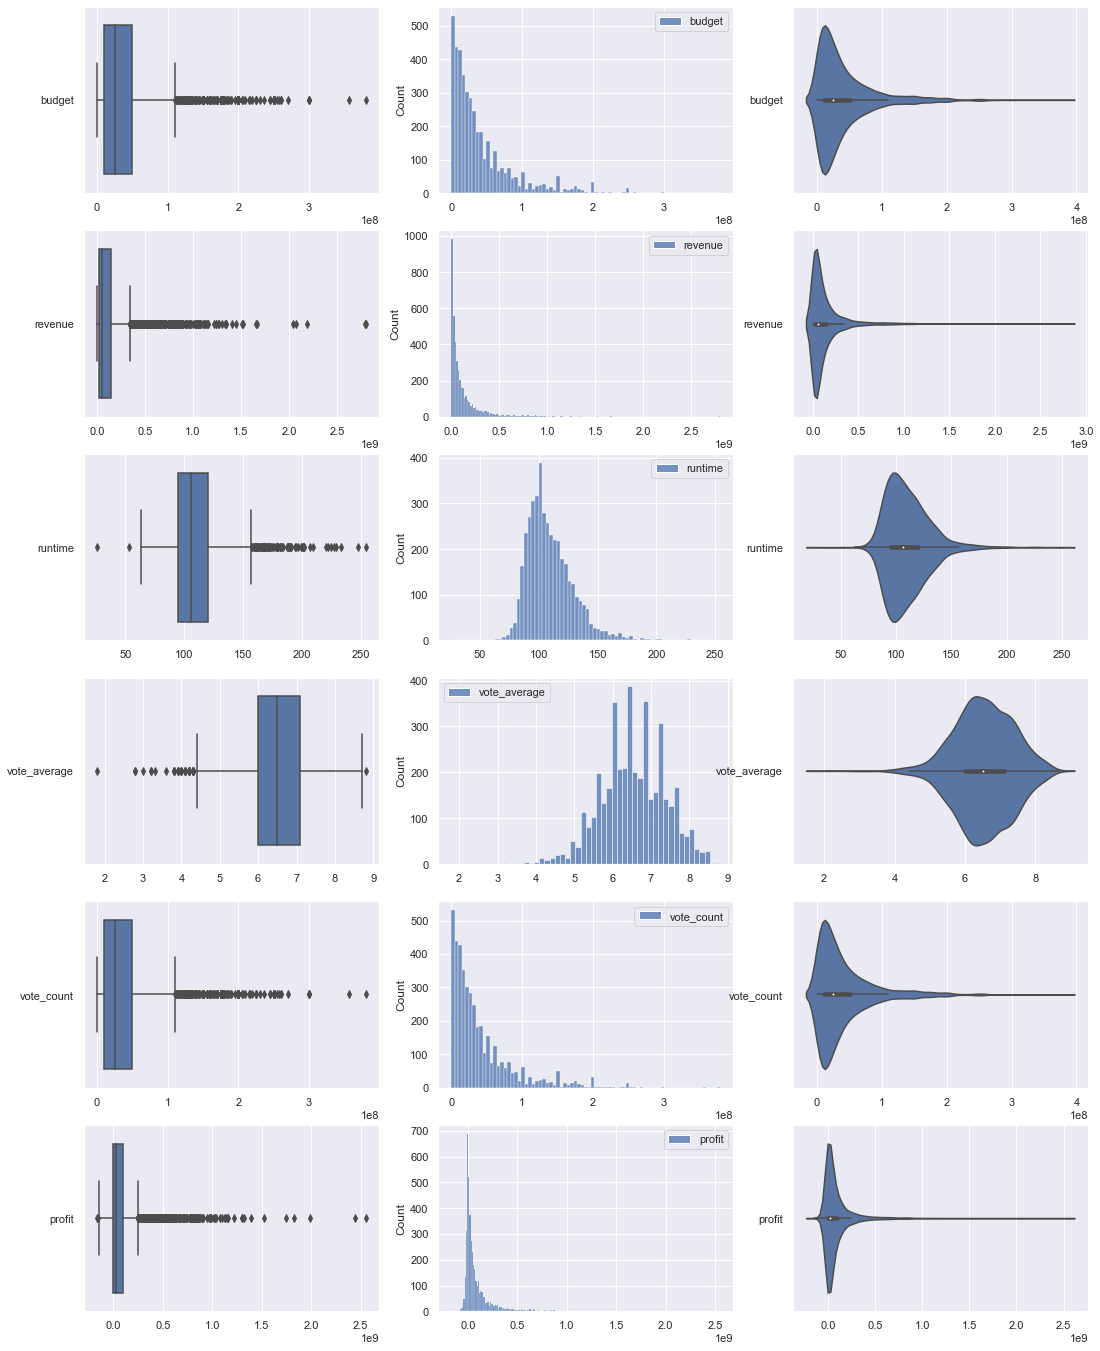

In [32]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0

for var in numeric:
    x = pd.DataFrame(numeric[var])
    sb.boxplot(data = x, orient = "h", ax = axes[count,0])
    sb.histplot(data = x, ax = axes[count,1])
    sb.violinplot(data = x, orient = "h", ax = axes[count,2])
    count += 1

In [33]:
# Calculate the complete  correlation matrix
numeric.corr()

,budget,revenue,runtime,vote_average,vote_count,profit
budget,1.000000,0.714582,0.254812,0.002397,1.000000,0.574765
revenue,0.714582,1.000000,0.254263,0.208164,0.714582,0.983173
runtime,0.254812,0.254263,1.000000,0.417617,0.254812,0.230890
vote_average,0.002397,0.208164,0.417617,1.000000,0.002397,0.242879
vote_count,1.000000,0.714582,0.254812,0.002397,1.000000,0.574765
profit,0.574765,0.983173,0.230890,0.242879,0.574765,1.000000


<AxesSubplot:>

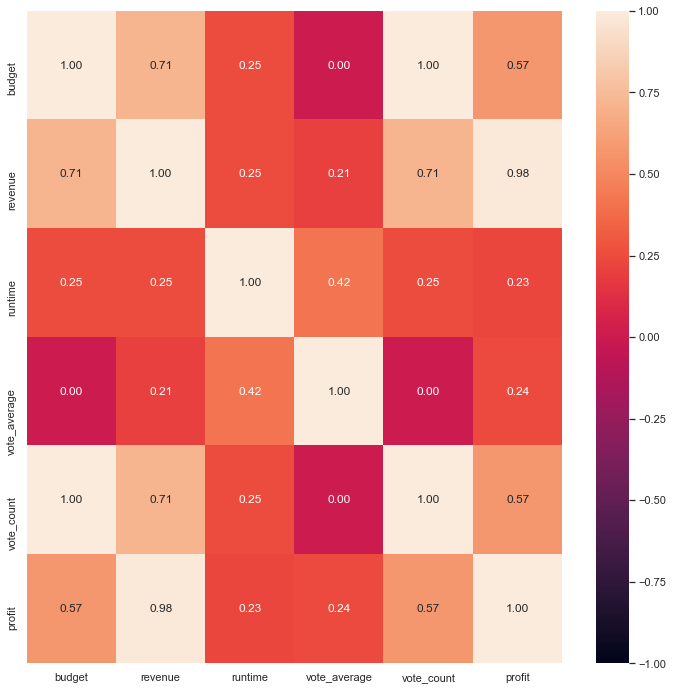

In [34]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numeric.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

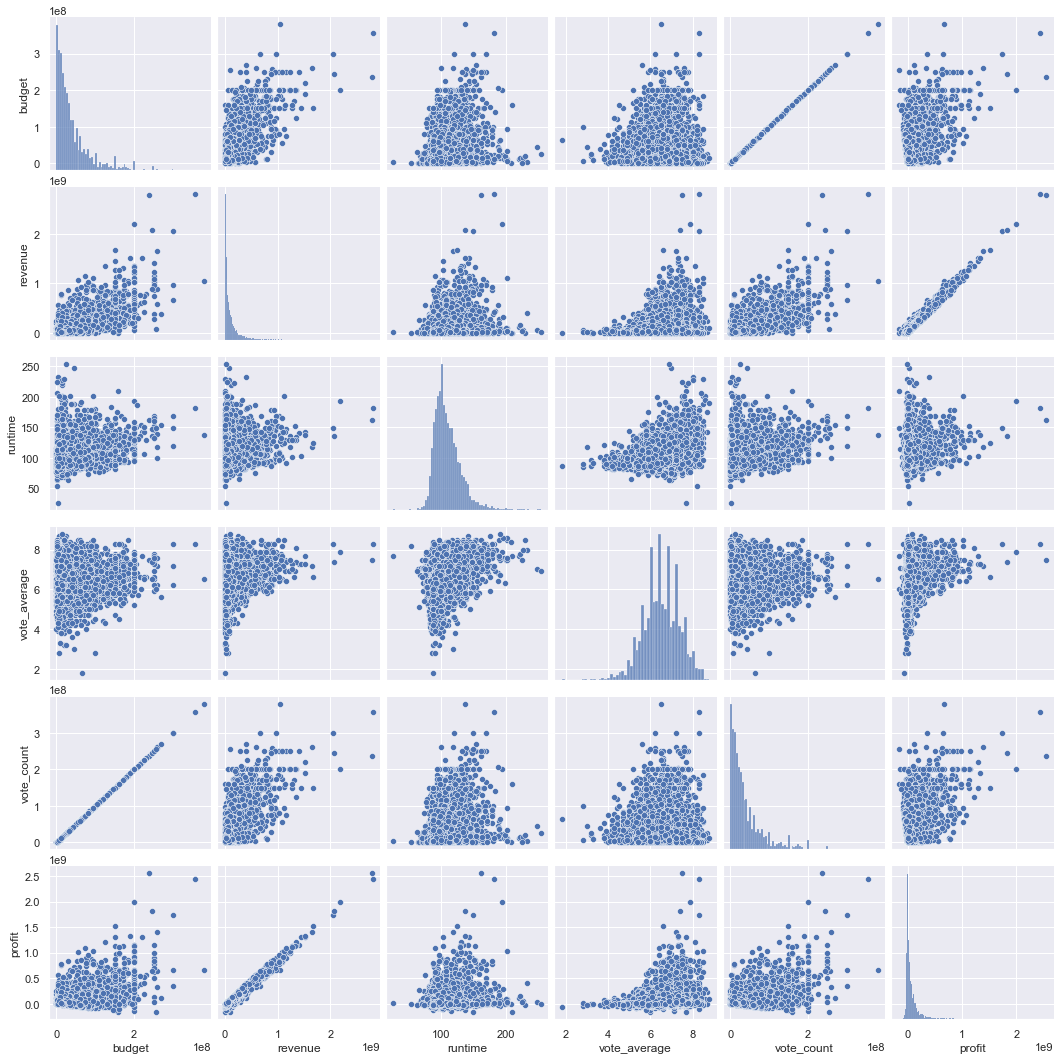

In [35]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric)

<AxesSubplot:xlabel='genre', ylabel='Count'>

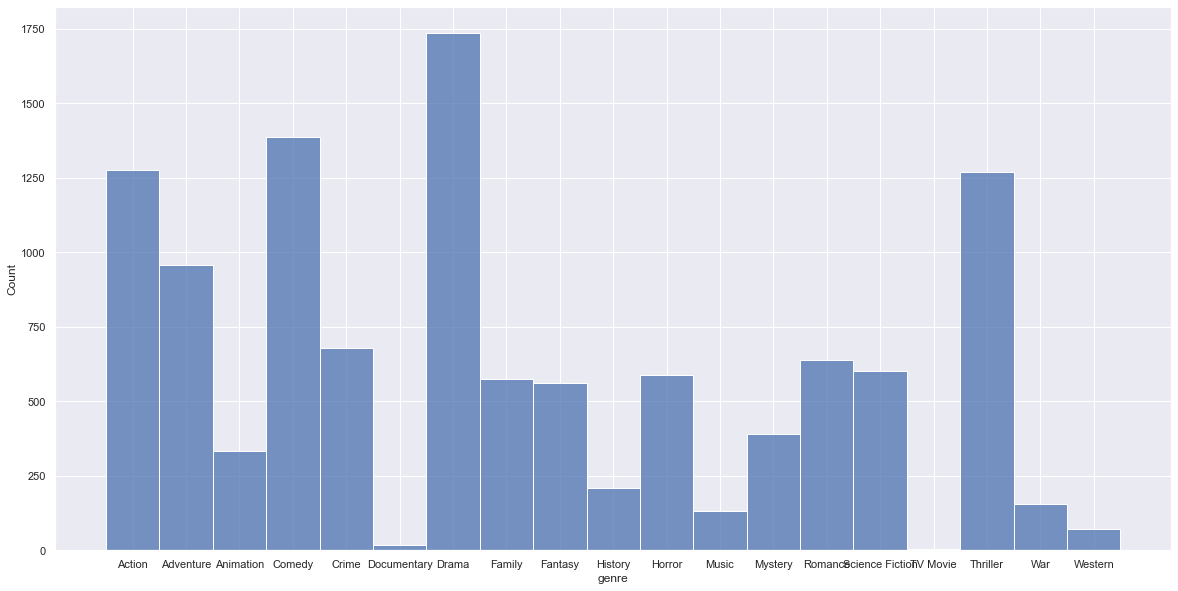

In [36]:
f = plt.figure(figsize=(20, 10))
gen_lst = []
for x in genres.columns:
    y = released[x].sum()
    gen_lst.append([x] * y)

gen_lst = pd.DataFrame(sum(gen_lst, []), columns = ["genre"])
gen_lst

sb.histplot(data = gen_lst, x = "genre", )

Type of Language : 27
en    3959
ja      41
fr      40
es      38
ko      28
zh      25
ru      15
it      15
cn      14
de      10
hi       6
no       5
da       5
pt       3
th       3
cs       2
sv       2
pl       2
fa       2
te       2
id       2
nl       1
uk       1
el       1
nb       1
ar       1
fi       1
ca       0
eu       0
kn       0
he       0
hu       0
la       0
ml       0
ms       0
ro       0
sr       0
ta       0
tl       0
tr       0
0        0
Name: original_language, dtype: int64


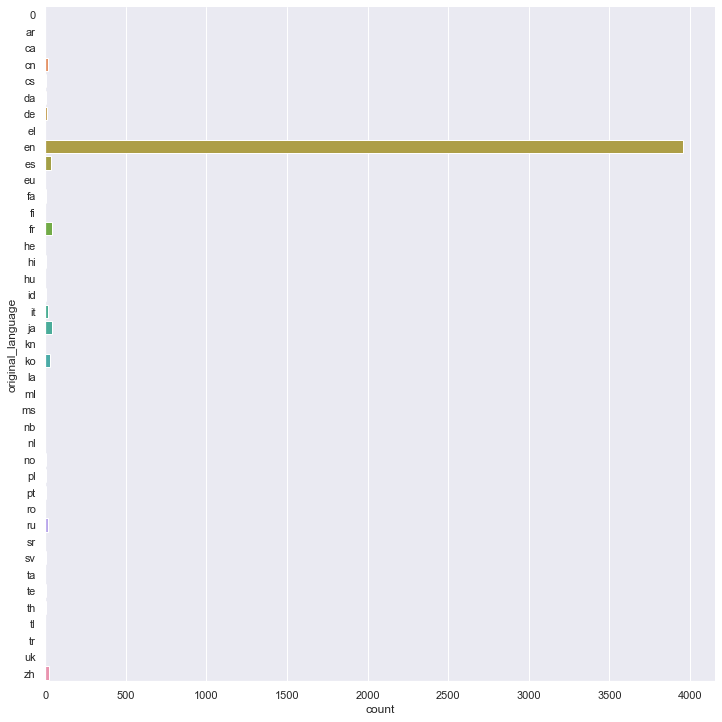

In [37]:
# Generations in the Dataset
print("Type of Language :", len(categorical["original_language"].unique()))

# Pokemons in each Generation
print(categorical["original_language"].value_counts())
sb.catplot(y = "original_language", data = categorical, kind = "count", height = 10)

2016    208
2017    173
2018    172
2014    169
2006    162
       ... 
1949      1
1945      1
1930      1
1921      1
1920      1
Name: year, Length: 91, dtype: int64


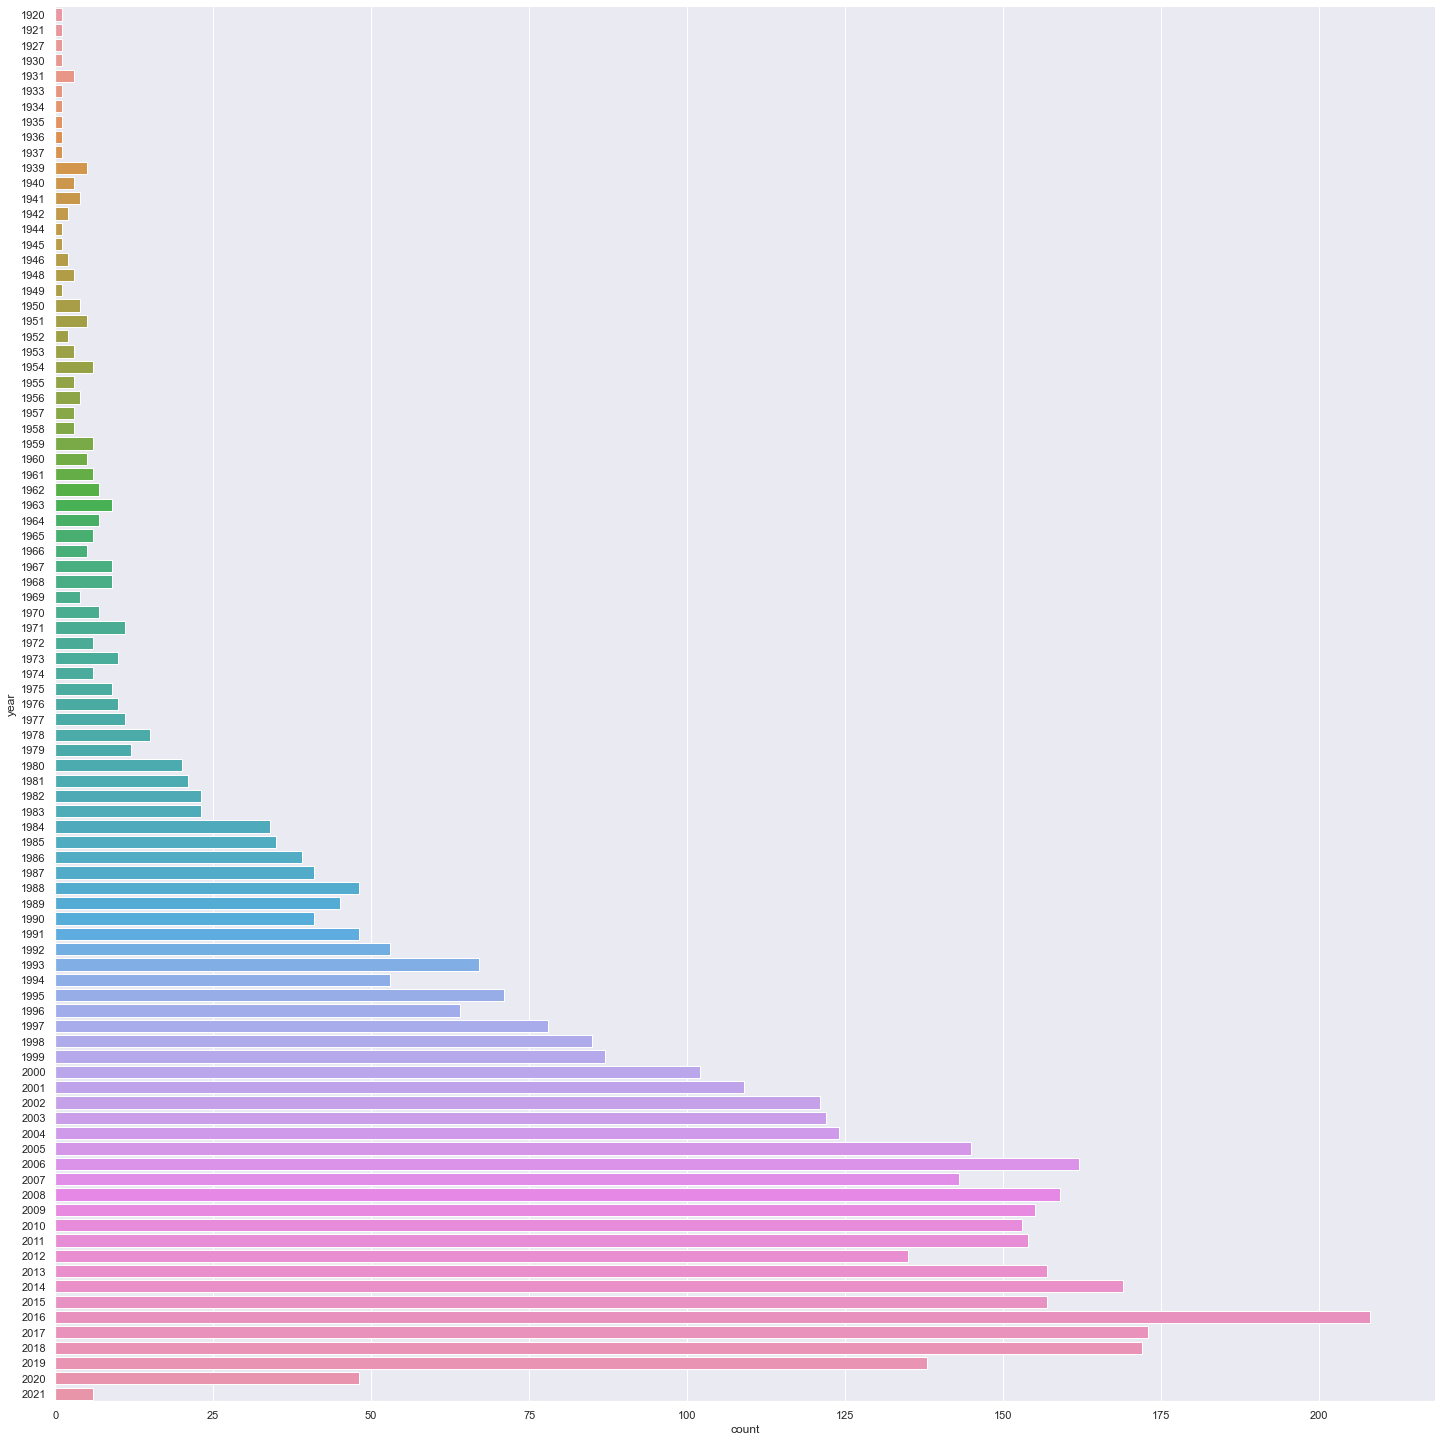

In [38]:
categorical = released[["genres", "original_language", "production_countries", "month", "year"]]
print(categorical["year"].value_counts())
sb.catplot(y = "year", data = categorical, kind = "count", height = 20)

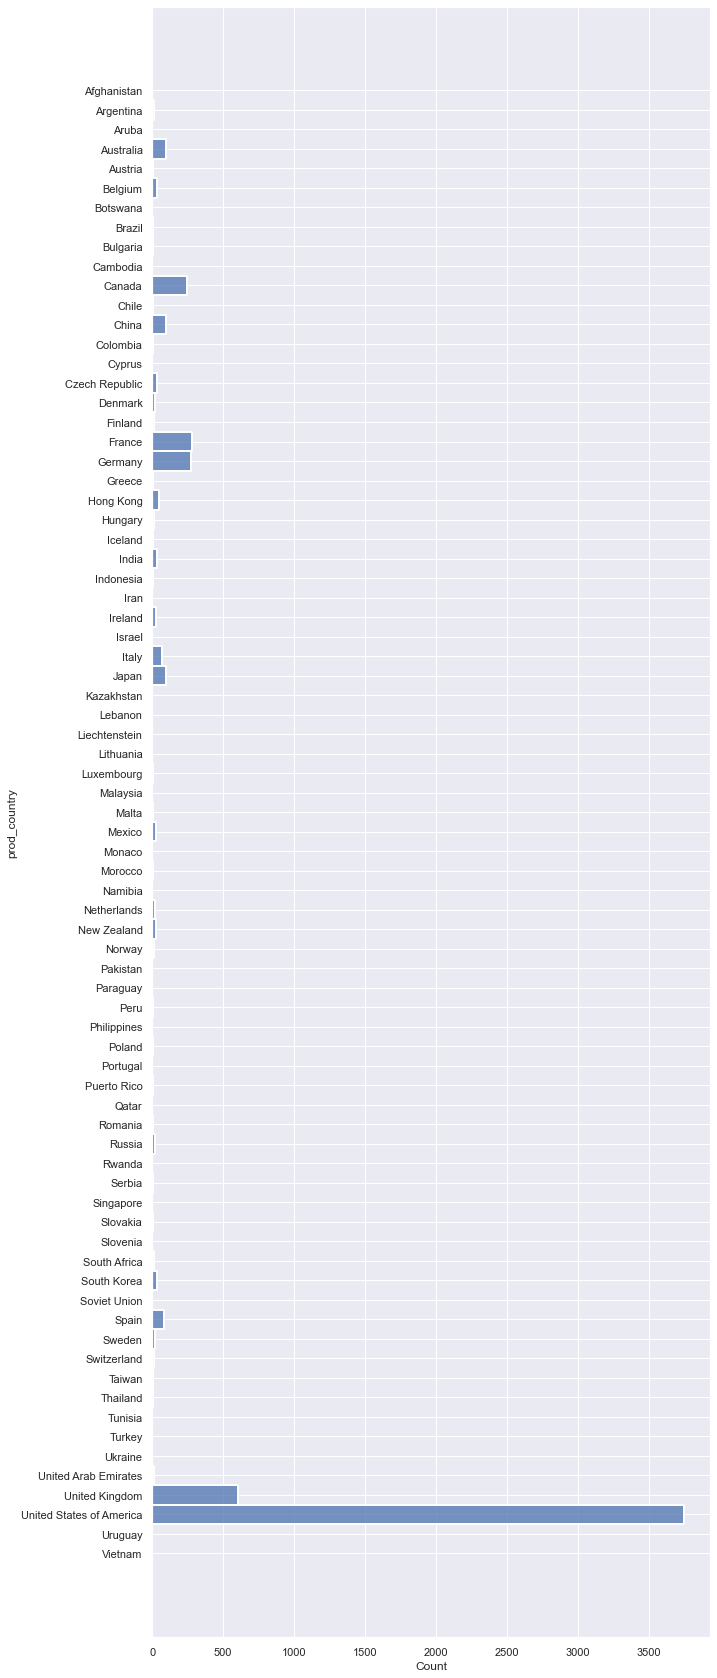

In [39]:
f = plt.figure(figsize=(10, 30))
gen_lst = []
for x in prod_country.columns:
    y = released[x].sum()
    gen_lst.append([x] * y)

gen_lst = pd.DataFrame(sum(gen_lst, []), columns = ["prod_country"])
gen_lst

g = sb.histplot(data = gen_lst, y = "prod_country")

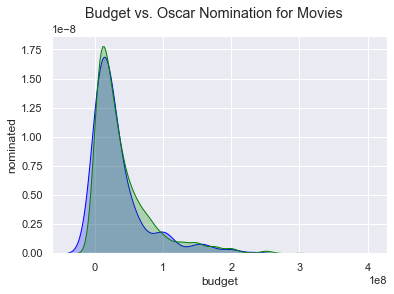

In [40]:
fig, ax = plt.subplots()

sb.kdeplot(released[released["nominated"]==1]["budget"], shade=True, color="blue", label="Nominated", ax=ax, cbar = True, fill = True)
sb.kdeplot(released[released["nominated"]==0]["budget"], shade=True, color="green", label="Was not nominated", ax=ax, cbar = True, fill = True)

ax.set_xlabel("budget")
ax.set_ylabel("nominated")

fig.suptitle("Budget vs. Oscar Nomination for Movies");

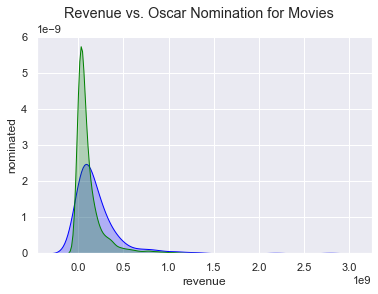

In [41]:
fig, ax = plt.subplots()

sb.kdeplot(released[released["nominated"]==1]["revenue"], shade=True, color="blue", label="Nominated", ax=ax, cbar = True, fill = True)
sb.kdeplot(released[released["nominated"]==0]["revenue"], shade=True, color="green", label="Was not nominated", ax=ax, cbar = True, fill = True)

ax.set_xlabel("revenue")
ax.set_ylabel("nominated")

fig.suptitle("Revenue vs. Oscar Nomination for Movies");

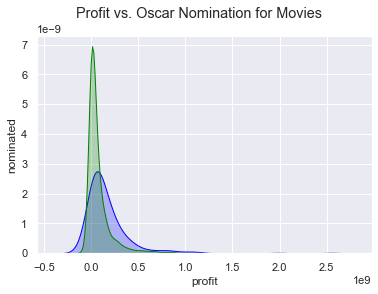

In [42]:
fig, ax = plt.subplots()

sb.kdeplot(released[released["nominated"]==1]["profit"], shade=True, color="blue", label="Nominated", ax=ax, cbar = True, fill = True)
sb.kdeplot(released[released["nominated"]==0]["profit"], shade=True, color="green", label="Was not nominated", ax=ax, cbar = True, fill = True)

ax.set_xlabel("profit")
ax.set_ylabel("nominated")

fig.suptitle("Profit vs. Oscar Nomination for Movies");

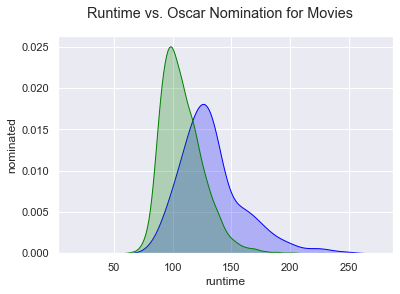

In [43]:
fig, ax = plt.subplots()

sb.kdeplot(released[released["nominated"]==1]["runtime"], shade=True, color="blue", label="Nominated", ax=ax)
sb.kdeplot(released[released["nominated"]==0]["runtime"], shade=True, color="green", label="Was not nominated", ax=ax)

ax.set_xlabel("runtime")
ax.set_ylabel("nominated")

fig.suptitle("Runtime vs. Oscar Nomination for Movies");

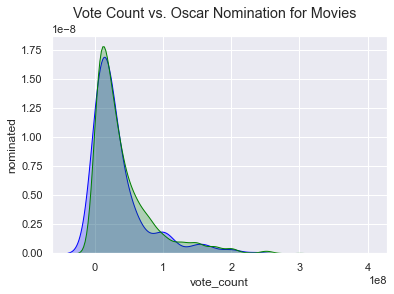

In [44]:
fig, ax = plt.subplots()

sb.kdeplot(released[released["nominated"]==1]["vote_count"], shade=True, color="blue", label="Nominated", ax=ax)
sb.kdeplot(released[released["nominated"]==0]["vote_count"], shade=True, color="green", label="Was not nominated", ax=ax)

ax.set_xlabel("vote_count")
ax.set_ylabel("nominated")

fig.suptitle("Vote Count vs. Oscar Nomination for Movies");

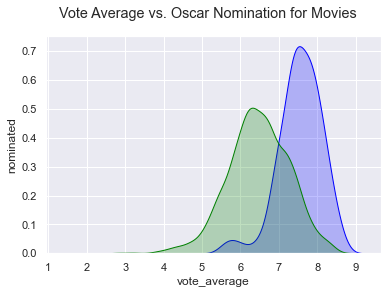

In [45]:
fig, ax = plt.subplots()

sb.kdeplot(released[released["nominated"]==1]["vote_average"], shade=True, color="blue", label="Nominated", ax=ax)
sb.kdeplot(released[released["nominated"]==0]["vote_average"], shade=True, color="green", label="Was not nominated", ax=ax)

ax.set_xlabel("vote_average")
ax.set_ylabel("nominated")

fig.suptitle("Vote Average vs. Oscar Nomination for Movies");

In [46]:
numeric

,budget,revenue,runtime,vote_average,vote_count,profit
1,50000000.0,100000000.0,101.0,7.7,50000000.0,50000000.0
3,60000000.0,25814306.0,104.0,7.3,60000000.0,-34185694.0
4,200000000.0,159533000.0,151.0,6.9,200000000.0,-40467000.0
8,30000000.0,23205000.0,128.0,6.5,30000000.0,-6795000.0
13,23000000.0,74000000.0,102.0,5.3,23000000.0,51000000.0
...,...,...,...,...,...,...
9988,15000000.0,17080167.0,114.0,6.2,15000000.0,2080167.0
9989,5500000.0,58972904.0,123.0,6.9,5500000.0,53472904.0
9990,12000000.0,20000000.0,182.0,7.2,12000000.0,8000000.0
9992,80000000.0,266728738.0,128.0,6.6,80000000.0,186728738.0


In [47]:
categorical

,genres,original_language,production_countries,month,year
1,"(Action, Comedy, Family, Animation, Adventure)",en,"(United States of America,)",2,2021
3,"(Fantasy, Action, Adventure)",en,"(Germany, Canada, China, United States of Amer...",12,2020
4,"(Fantasy, Action, Adventure)",en,"(United States of America,)",12,2020
8,"(Thriller, Crime)",en,"(United States of America,)",1,2021
13,"(Fantasy, Action, Science Fiction)",en,"(Cyprus, United States of America)",11,2020
...,...,...,...,...,...
9988,"(Thriller, Science Fiction, Horror)",en,"(United States of America,)",5,1984
9989,"(Drama, History)",en,"(United Kingdom,)",5,1981
9990,"(Adventure, War)",en,"(United States of America,)",12,1966
9992,"(Drama, Comedy, Romance)",en,"(United States of America,)",12,2003


<AxesSubplot:xlabel='original_language', ylabel='count'>

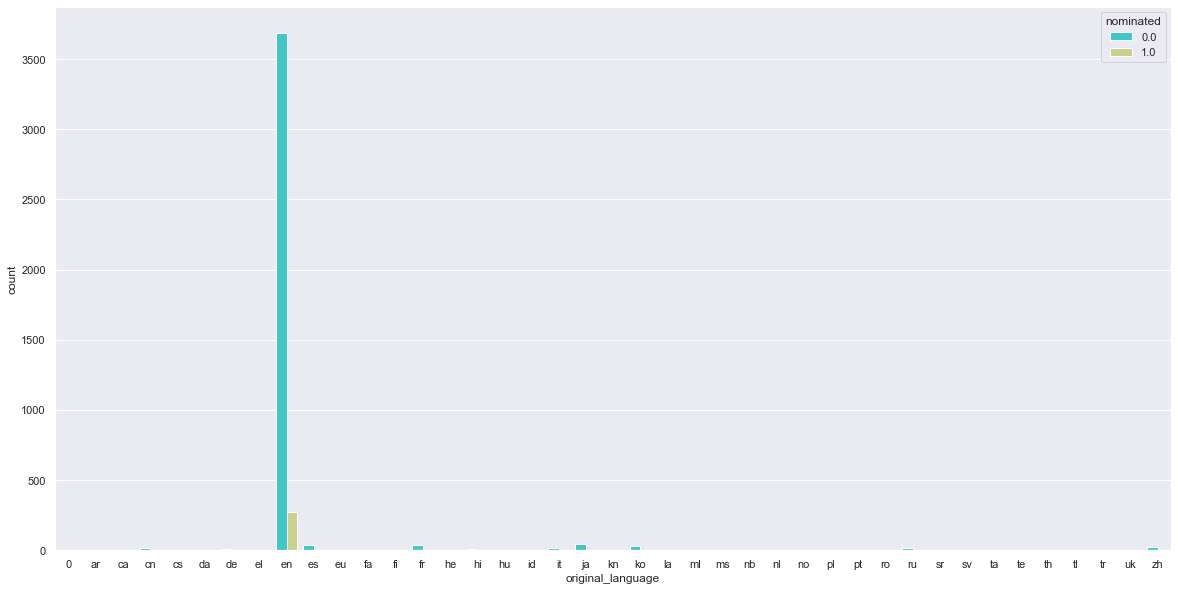

In [48]:
plt.figure(figsize=(20,10))
sb.countplot(x='original_language',data=released, palette='rainbow',hue='nominated')

<AxesSubplot:xlabel='month', ylabel='count'>

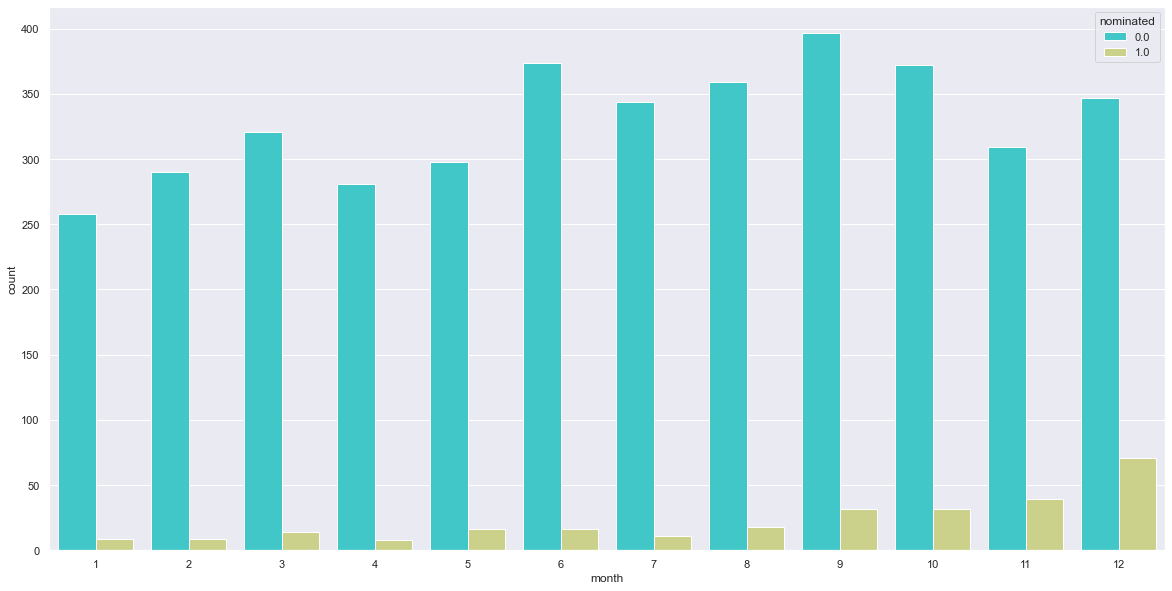

In [49]:
plt.figure(figsize=(20,10))
sb.countplot(x='month',data=released, palette='rainbow',hue='nominated')

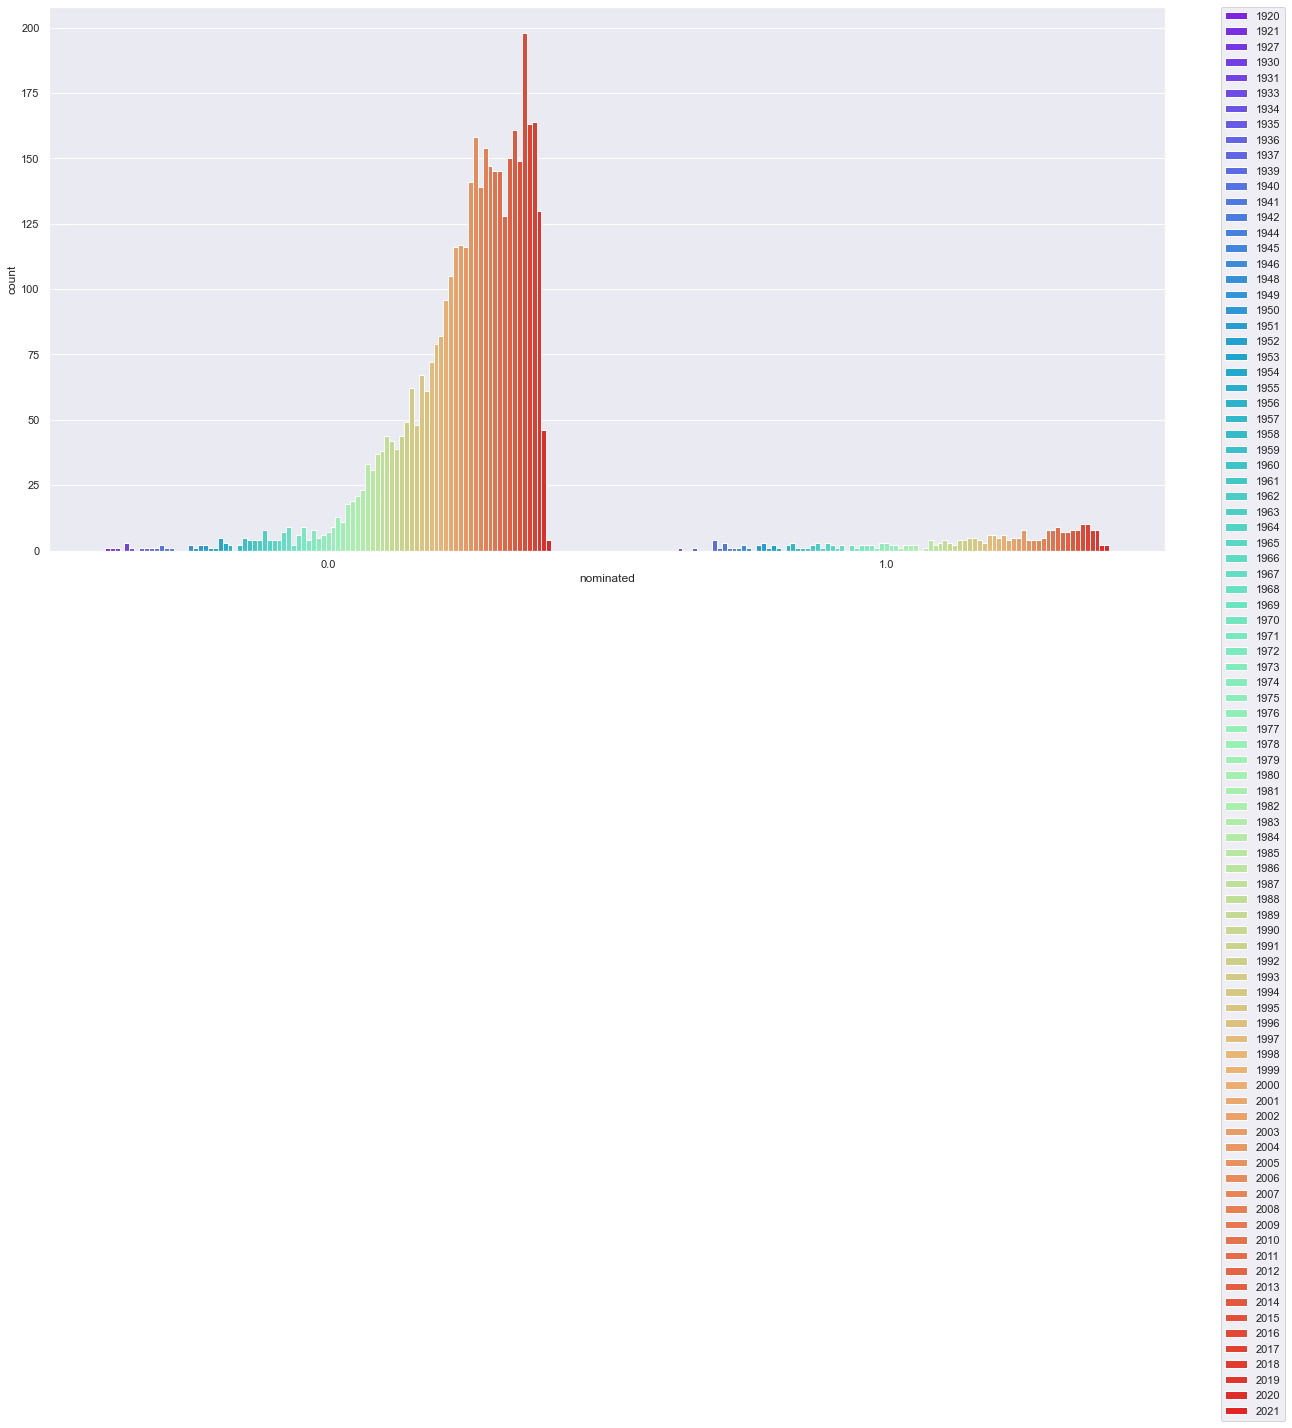

In [76]:
plt.figure(figsize=(20,10))
sb.countplot(x='nominated',data=released, palette='rainbow',hue='year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='Count', ylabel='genre'>

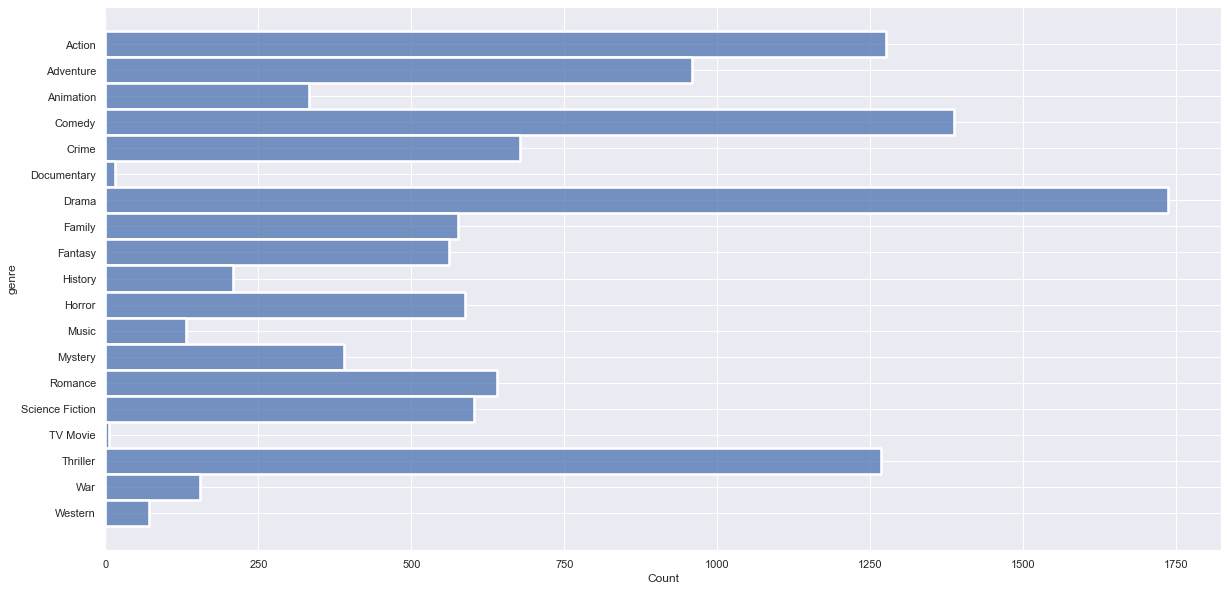

In [77]:
f = plt.figure(figsize=(20, 10))
gen_lst = []
for x in genres.columns:
    y = released[x].sum()
    gen_lst.append([x] * y)

gen_lst = pd.DataFrame(sum(gen_lst, []), columns = ["genre"])
gen_lst

sb.histplot(data = gen_lst, y = "genre")

In [51]:
gen = pd.DataFrame(released[genres.columns])
df = pd.concat([gen, released.nominated], axis = 1)
df.corr()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nominated
Action,1.000000,0.283990,-0.098220,-0.186504,0.135162,-0.015377,-0.227975,-0.135148,0.034290,-0.018630,-0.137891,-0.102795,-0.101130,-0.227602,0.238585,0.007346,0.203645,0.072868,0.006245,-0.102510
Adventure,0.283990,1.000000,0.261997,0.009033,-0.158211,-0.033387,-0.247976,0.318578,0.257851,-0.037004,-0.172007,-0.060994,-0.102386,-0.138930,0.187894,0.030683,-0.120267,0.003261,0.034745,-0.067265
Animation,-0.098220,0.261997,1.000000,0.153616,-0.118091,-0.018005,-0.197527,0.611982,0.181233,-0.062386,-0.117420,0.028956,-0.080972,-0.079225,-0.021082,-0.010052,-0.181636,-0.047411,-0.024493,-0.066357
Comedy,-0.186504,0.009033,0.153616,1.000000,-0.094170,-0.018484,-0.231743,0.268669,0.038370,-0.135782,-0.176246,0.069773,-0.170699,0.188245,-0.135385,-0.024064,-0.376408,-0.103696,-0.040420,-0.084341
Crime,0.135162,-0.158211,-0.118091,-0.094170,1.000000,-0.016457,0.077661,-0.154911,-0.148272,-0.048817,-0.121765,-0.059606,0.094491,-0.139760,-0.137832,-0.015049,0.270876,-0.081593,-0.012008,-0.023867
Documentary,-0.015377,-0.033387,-0.018005,-0.018484,-0.016457,1.000000,-0.043685,-0.002036,-0.024125,0.003781,-0.024791,0.122360,-0.019662,-0.026050,-0.025157,-0.002122,-0.040374,-0.011992,-0.008061,-0.016268
Drama,-0.227975,-0.247976,-0.197527,-0.231743,0.077661,-0.043685,1.000000,-0.214214,-0.173851,0.230092,-0.202546,0.061450,0.022703,0.187683,-0.200654,-0.014770,-0.013965,0.142937,-0.004453,0.222186
Family,-0.135148,0.318578,0.611982,0.268669,-0.154911,-0.002036,-0.214214,1.000000,0.285629,-0.087219,-0.157757,0.052292,-0.107636,-0.075519,-0.029989,-0.013676,-0.249635,-0.073594,-0.041210,-0.071278
Fantasy,0.034290,0.257851,0.181233,0.038370,-0.148272,-0.024125,-0.173851,0.285629,1.000000,-0.085816,-0.026349,0.002437,-0.059722,-0.001906,0.011831,-0.013469,-0.158834,-0.064940,-0.040304,-0.049523
History,-0.018630,-0.037004,-0.062386,-0.135782,-0.048817,0.003781,0.230092,-0.087219,-0.085816,1.000000,-0.082013,-0.002835,-0.049889,-0.032064,-0.092846,-0.007833,-0.065464,0.335185,-0.004216,0.183876


# Classification and Prediction

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9445383834967873

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9282334384858044

TPR Train :	 0.33513513513513515
TNR Train :	 0.9852092352092352
FPR Train :	 0.01479076479076479
FNR Train :	 0.6648648648648648

TPR Test :	 0.34444444444444444
TNR Test :	 0.9728353140916808
FPR Test :	 0.027164685908319185
FNR Test :	 0.6555555555555556


<AxesSubplot:>

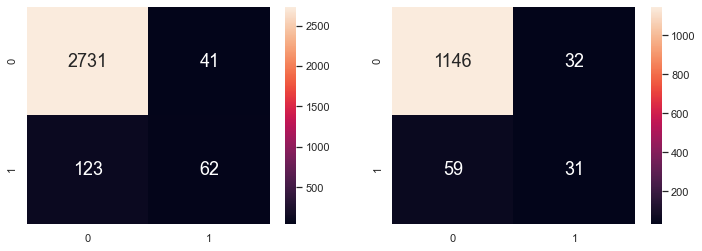

In [82]:
# Extract Response and Predictors
y = pd.DataFrame(released["nominated"])

genre_list = list(genres.columns)
country_list = list(prod_country.columns)
cols = sum([genre_list, country_list, ["budget", "month", "year", "revenue", "runtime", "vote_average", "vote_count", "profit"]], [])

X = pd.DataFrame(released[cols])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 8)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test :\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Test :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 570.7800000000001, 'vote_average <= 7.25\ngini = 0.117\nsamples = 2957\nvalue = [2772, 185]\nclass = not nominated'),
 Text(167.4, 407.70000000000005, 'vote_average <= 6.85\ngini = 0.038\nsamples = 2358\nvalue = [2312, 46]\nclass = not nominated'),
 Text(83.7, 244.62, 'profit <= -102250744.0\ngini = 0.014\nsamples = 1919\nvalue = [1905, 14]\nclass = not nominated'),
 Text(41.85, 81.53999999999996, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = not nominated'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.013\nsamples = 1917\nvalue = [1904, 13]\nclass = not nominated'),
 Text(251.10000000000002, 244.62, 'runtime <= 181.0\ngini = 0.135\nsamples = 439\nvalue = [407, 32]\nclass = not nominated'),
 Text(209.25, 81.53999999999996, 'gini = 0.128\nsamples = 437\nvalue = [407, 30]\nclass = not nominated'),
 Text(292.95, 81.53999999999996, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = nominated'),
 Text(502.20000000000005, 407.70000000000005, 'Drama <= 0.5\ngini = 0

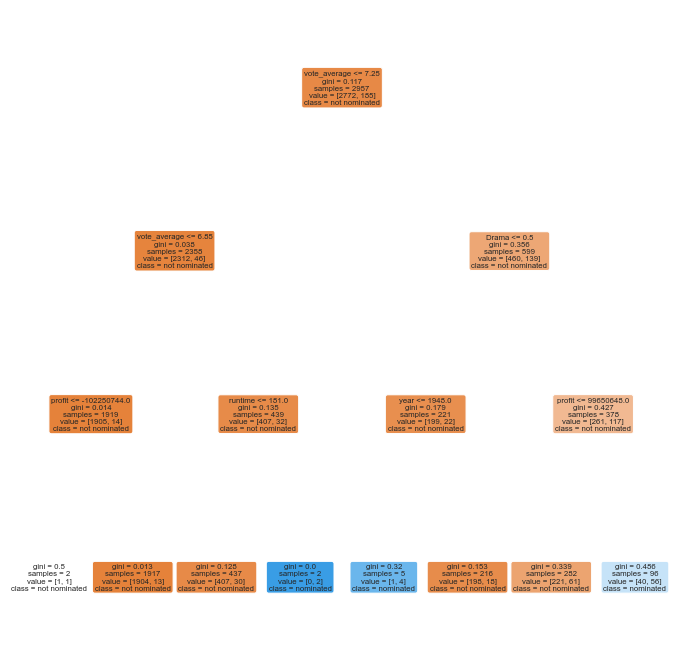

In [54]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["not nominated","nominated"])

In [55]:
# Extract titles for Prediction
released_pred = released[released["title"].isin(["Kung Fu Panda", "Parasite", "Jiu Jitsu"])]
released_pred

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,revenue,runtime,status,...,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,Vietnam,month,year,profit
13,23000000.0,"(Fantasy, Action, Science Fiction)",590706.0,tt9624766,en,"(Acme Rocket Fuel, Green Olive Films, Double T...","(Cyprus, United States of America)",74000000.0,102.0,Released,...,0,0,0,1,0,0,0,11,2020,51000000.0
150,11363000.0,"(Comedy, Thriller, Drama)",496243.0,tt6751668,ko,"(Barunson E&A, CJ Entertainment)","(South Korea,)",257591776.0,133.0,Released,...,0,0,0,0,0,0,0,5,2019,246228776.0
580,130000000.0,"(Action, Adventure, Animation, Family, Comedy)",9502.0,tt0441773,en,"(DreamWorks Animation,)","(United States of America,)",631744560.0,90.0,Released,...,0,0,0,1,0,0,0,6,2008,501744560.0


In [56]:
released_pred.loc[released_pred.nominated == 1]

,budget,genres,id,imdb_id,original_language,production_companies,production_countries,revenue,runtime,status,...,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Venezuela,Vietnam,month,year,profit
150,11363000.0,"(Comedy, Thriller, Drama)",496243.0,tt6751668,ko,"(Barunson E&A, CJ Entertainment)","(South Korea,)",257591776.0,133.0,Released,...,0,0,0,0,0,0,0,5,2019,246228776.0


In [57]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(released_pred[cols])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)
y_pred

array([0., 1., 0.])

In [58]:
# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["nominated_pred"], index = released_pred.index)
released_acc = pd.concat([released_pred[["title", "id", "nominated"]], y_pred], axis = 1)

released_acc

,title,id,nominated,nominated_pred
13,Jiu Jitsu,590706.0,0.0,0.0
150,Parasite,496243.0,1.0,1.0
580,Kung Fu Panda,9502.0,0.0,0.0


## Prediction of Class Prediction

In [59]:
# Predict Probabilities corresponding to Predictors
y_prob = dectree.predict_proba(X_pred)
y_prob

array([[0.99321857, 0.00678143],
       [0.41666667, 0.58333333],
       [0.93135011, 0.06864989]])

In [60]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["nominated_prob"], index = released_pred.index)
released_conf = pd.concat([released_acc, y_prob], axis = 1)

released_conf

,title,id,nominated,nominated_pred,nominated_prob
13,Jiu Jitsu,590706.0,0.0,0.0,0.006781
150,Parasite,496243.0,1.0,1.0,0.583333
580,Kung Fu Panda,9502.0,0.0,0.0,0.068650


[Text(334.8, 570.7800000000001, 'vote_average <= 7.25\ngini = 0.117\nsamples = 2957\nvalue = [2772, 185]\nclass = not nominated'),
 Text(167.4, 407.70000000000005, 'vote_average <= 6.85\ngini = 0.038\nsamples = 2358\nvalue = [2312, 46]\nclass = not nominated'),
 Text(83.7, 244.62, 'profit <= -102250744.0\ngini = 0.014\nsamples = 1919\nvalue = [1905, 14]\nclass = not nominated'),
 Text(41.85, 81.53999999999996, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = not nominated'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.013\nsamples = 1917\nvalue = [1904, 13]\nclass = not nominated'),
 Text(251.10000000000002, 244.62, 'runtime <= 181.0\ngini = 0.135\nsamples = 439\nvalue = [407, 32]\nclass = not nominated'),
 Text(209.25, 81.53999999999996, 'gini = 0.128\nsamples = 437\nvalue = [407, 30]\nclass = not nominated'),
 Text(292.95, 81.53999999999996, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = nominated'),
 Text(502.20000000000005, 407.70000000000005, 'Drama <= 0.5\ngini = 0

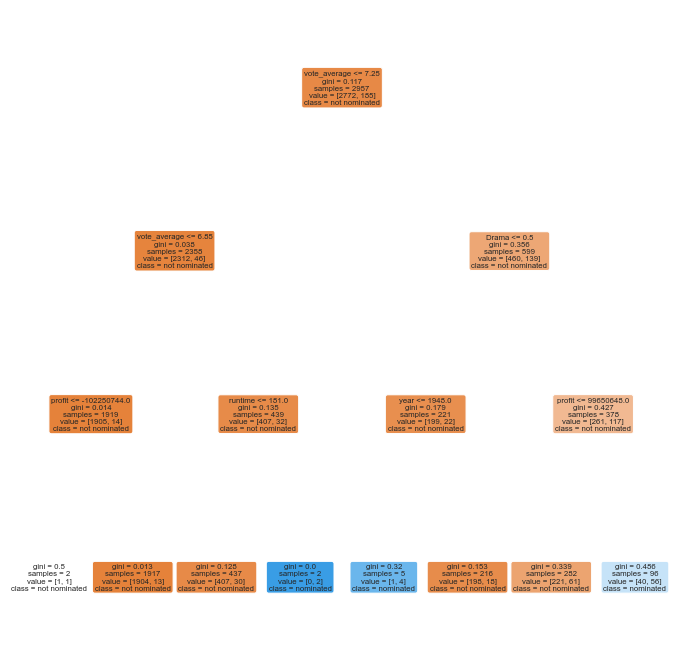

In [61]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["not nominated","nominated"])

# Random Forest

In [62]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
import numpy as np

# Extract Response and Predictors
y = pd.DataFrame(released['nominated'])
X = pd.DataFrame(released.drop(columns = ['nominated', "genres", "id", "imdb_id", "production_companies", "production_countries", "original_language", "status", "title", "Film Studio/Producer(s)"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [63]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.nominated.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.9350693270206291

TPR Train :	 0.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 1.0


<AxesSubplot:>

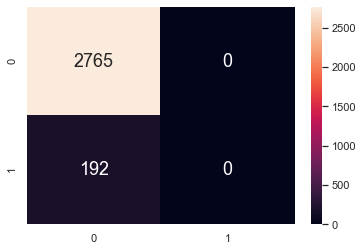

In [64]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9345425867507886

TPR Test :	 0.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 1.0


<AxesSubplot:>

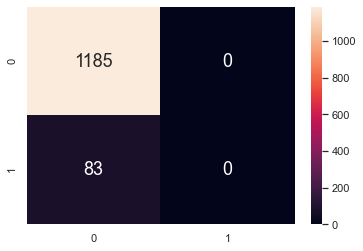

In [65]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [66]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(released['nominated'])
X = pd.DataFrame(released.drop(columns = ['nominated', "genres", "id", "imdb_id", "production_companies", "production_countries", "original_language", "status", "title", "Film Studio/Producer(s)"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.nominated.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9634764964491038

TPR Train :	 0.41621621621621624
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.5837837837837838


<AxesSubplot:>

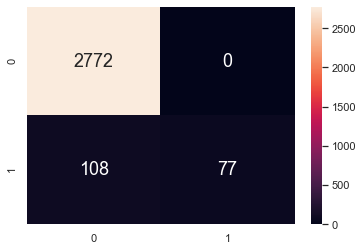

In [67]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9353312302839116

TPR Test :	 0.1
TNR Test :	 0.9991511035653651

FPR Test :	 0.0008488964346349745
FNR Test :	 0.9


<AxesSubplot:>

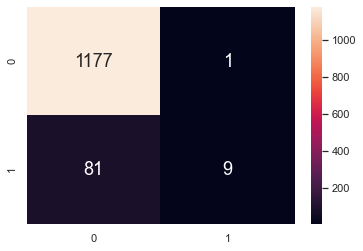

In [68]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [69]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(released['nominated'])
X = pd.DataFrame(released.drop(columns = ['nominated', "genres", "id", "imdb_id", "production_companies", "production_countries", "original_language", "status", "title", "Film Studio/Producer(s)"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [70]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.nominated.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [71]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=600)
0.9428488132802852


In [72]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(released['nominated'])
X = pd.DataFrame(released.drop(columns = ['nominated', "genres", "id", "imdb_id", "production_companies", "production_countries", "original_language", "status", "title", "Film Studio/Producer(s)"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 600,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.nominated.ravel())

RandomForestClassifier(max_depth=10, n_estimators=600)

Train Data
Accuracy  :	 0.9634764964491038

TPR Train :	 0.41621621621621624
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.5837837837837838


<AxesSubplot:>

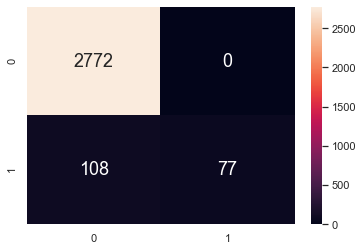

In [73]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9337539432176656

TPR Test :	 0.08888888888888889
TNR Test :	 0.99830220713073

FPR Test :	 0.001697792869269949
FNR Test :	 0.9111111111111111


<AxesSubplot:>

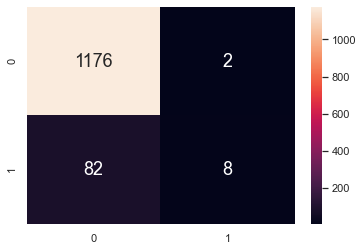

In [74]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [75]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rforest.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rforest.estimators_[5]

X = pd.DataFrame(released.drop(columns = ['nominated', "genres", "id", "imdb_id", "production_companies", "production_countries", "original_language", "status", "title", "Film Studio/Producer(s)"]))
X

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')